# Electricity and Renewable Growth in Indonesia and Neighbors

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib, sklearn
from sklearn.linear_model import LinearRegression

### Menyiapkan data yang akan digunakan



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
target_countries = ["Indonesia", "Malaysia", "Singapore"]
target_columns = ["iso_code", "country", "year", "population", "carbon_intensity_elec", "electricity_demand",
                  "per_capita_electricity", "primary_energy_consumption", "renewables_electricity"]
df = df[(df['country'].isin(target_countries)) & (df['year'] >= 2000)][target_columns]
df

,iso_code,country,year,population,carbon_intensity_elec,electricity_demand,per_capita_electricity,primary_energy_consumption,renewables_electricity
9429,IDN,Indonesia,2000,214072416.0,630.661,98.04,457.976,1163.518,19.60
9430,IDN,Indonesia,2001,217112432.0,626.036,106.16,488.963,1246.258,22.19
9431,IDN,Indonesia,2002,220115088.0,643.489,113.04,513.549,1280.384,21.00
9432,IDN,Indonesia,2003,223080128.0,656.530,117.39,526.223,1389.068,19.82
9433,IDN,Indonesia,2004,225938592.0,653.711,124.78,552.274,1375.847,20.97
...,...,...,...,...,...,...,...,...,...
17415,SGP,Singapore,2019,5866408.0,475.803,54.14,9228.815,929.679,1.51
17416,SGP,Singapore,2020,5909874.0,474.468,53.07,8979.887,910.518,1.49
17417,SGP,Singapore,2021,5941063.0,475.892,55.79,9390.576,910.714,1.62
17418,SGP,Singapore,2022,5975689.0,473.999,56.92,9525.261,881.846,2.33


Menampilkan informasi struktur data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 9429 to 17419
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    72 non-null     object 
 1   country                     72 non-null     object 
 2   year                        72 non-null     int64  
 3   population                  72 non-null     float64
 4   carbon_intensity_elec       70 non-null     float64
 5   electricity_demand          70 non-null     float64
 6   per_capita_electricity      72 non-null     float64
 7   primary_energy_consumption  72 non-null     float64
 8   renewables_electricity      72 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 5.6+ KB


In [4]:
df.isnull().sum()

,0
iso_code,0
country,0
year,0
population,0
carbon_intensity_elec,2
electricity_demand,2
per_capita_electricity,0
primary_energy_consumption,0
renewables_electricity,0


Forward fill pada nilai kosong (missing values) dan memeriksa ulang jumlah nilai kosong di setiap kolom

In [5]:
columns_to_fill = ["carbon_intensity_elec", "electricity_demand"]
df[columns_to_fill] = df[columns_to_fill].ffill()
df.isnull().sum()

,0
iso_code,0
country,0
year,0
population,0
carbon_intensity_elec,0
electricity_demand,0
per_capita_electricity,0
primary_energy_consumption,0
renewables_electricity,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(72, 9)

Menyimpan data yang sudah dibersihkan ke dalam file CSV

In [8]:
df.to_csv('energy_selected_countries.csv', index=False)

## Data Understanding

Melihat statistik deskriptif untuk data numerik

In [9]:
df.describe()

,year,population,carbon_intensity_elec,electricity_demand,per_capita_electricity,primary_energy_consumption,renewables_electricity
count,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2011.500000,9.401670e+07,604.096944,127.547222,4677.626014,1182.287333,17.437944
std,6.970764,1.105354e+08,78.746228,82.398755,3324.334183,545.048659,17.329938
min,2000.000000,4.053602e+06,470.783000,31.670000,457.976000,443.014000,0.490000
25%,2005.750000,5.802030e+06,511.489000,52.797500,1048.202750,810.451750,1.507500
50%,2011.500000,2.942218e+07,630.899000,114.685000,4437.319500,1001.215000,10.180000
75%,2017.250000,2.295532e+08,666.805750,170.225000,8614.790250,1422.061500,29.170000
max,2023.000000,2.775341e+08,696.276000,334.510000,9531.607000,2807.733000,65.410000


**Insight dari statistik deskriptif**
- Indonesia **dominan dari sisi populasi** dibanding Malaysia dan Singapore, sehingga menarik mean ke atas.
- Ada **tantangan besar** di pengurangan intensitas karbon karena masih banyak ketergantungan pada energi berbasis karbon.
- Produksi listrik rendah karbon dan berbasis energi terbarukan **masih kecil secara proporsi** dibanding total listrik, yang menunjukkan upaya negara-negara ini untuk shifting ke low-carbon electricity **masih jauh**.

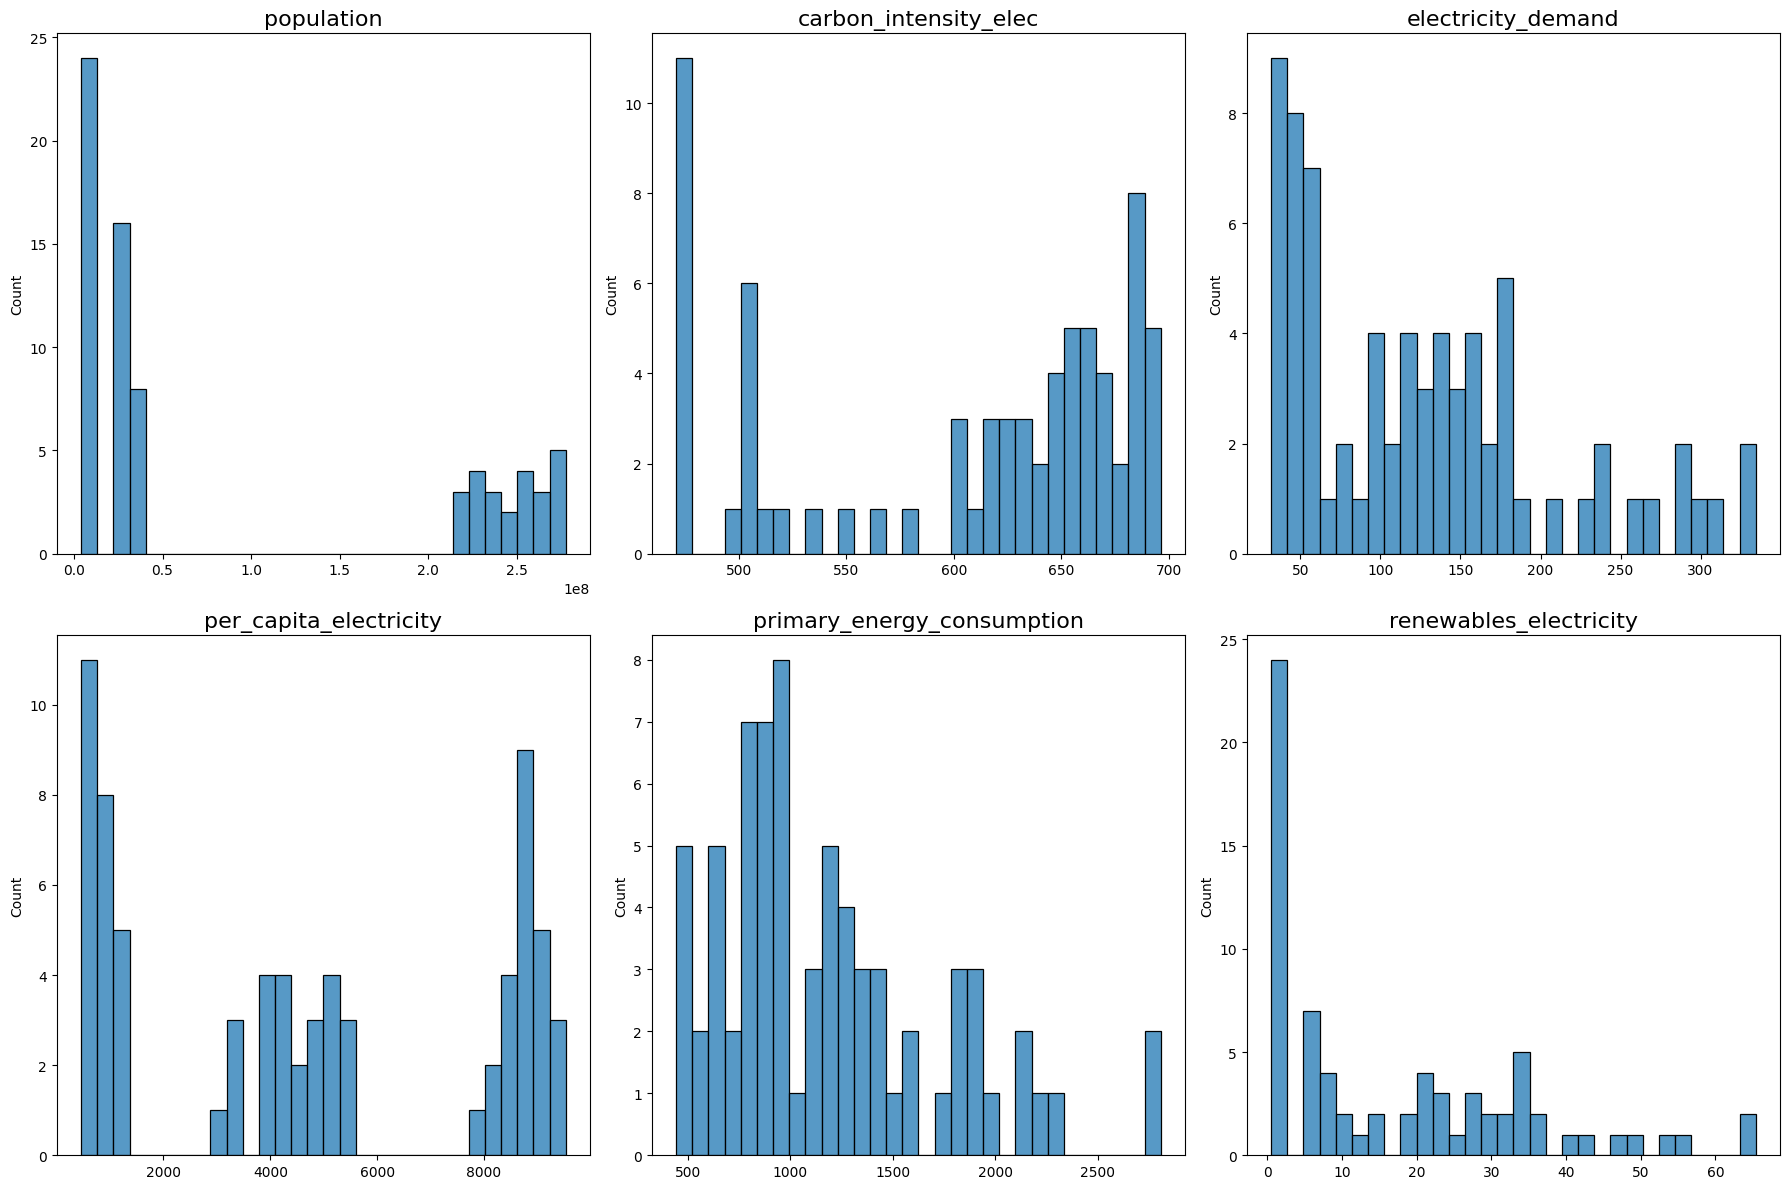

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, col in enumerate(df.drop(columns=['iso_code', 'country', 'year']).columns):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

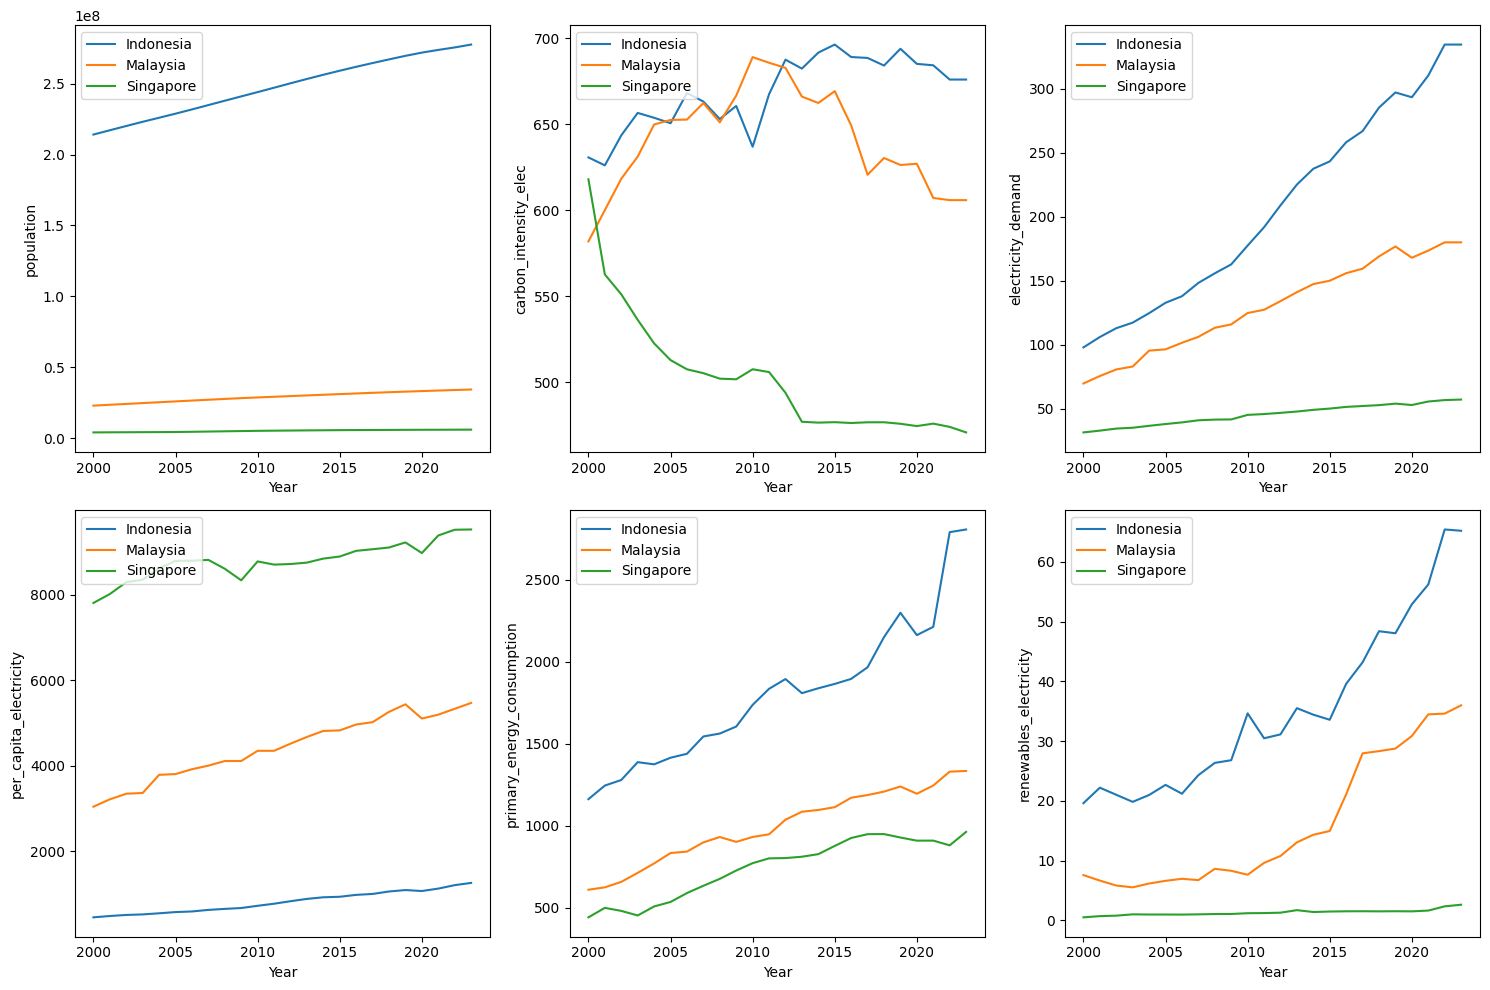

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (col, ax) in enumerate(zip(df.drop(columns=['iso_code', 'country', 'year']).columns, axes.flatten())):
    sns.lineplot(x='year', y=col, hue='country', data=df, ax=ax)
    ax.set_xlabel("Year")
    ax.set_ylabel(col)
    ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi time series ini, didapatkan insight:
- Indonesia punya tantangan energi yang jauh lebih besar karena **pertumbuhan penduduk**.
- Singapore berhasil **menurunkan** carbon intensity cukup cepat, sedangkan Malaysia **cenderung menurun** sejak 2012 dan Indonesia **terlambat**.
- Pertumbuhan permintaan listrik **sangat tajam** di Indonesia. Hal ini akan **membebani** jika transisi energi tidak cepat.
- Tingkat konsumsi listrik Indonesia **masih jauh dari negara tetangga** — peluang besar untuk **ekspansi elektrifikasi**.
- Indonesia **membutuhkan lebih banyak energi primer**, bisa menjadi tantangan ketahanan energi.
- Indonesia dan Malaysia punya **kemajuan di renewables** (energi terbarukan), walau **proporsinya masih kecil**.

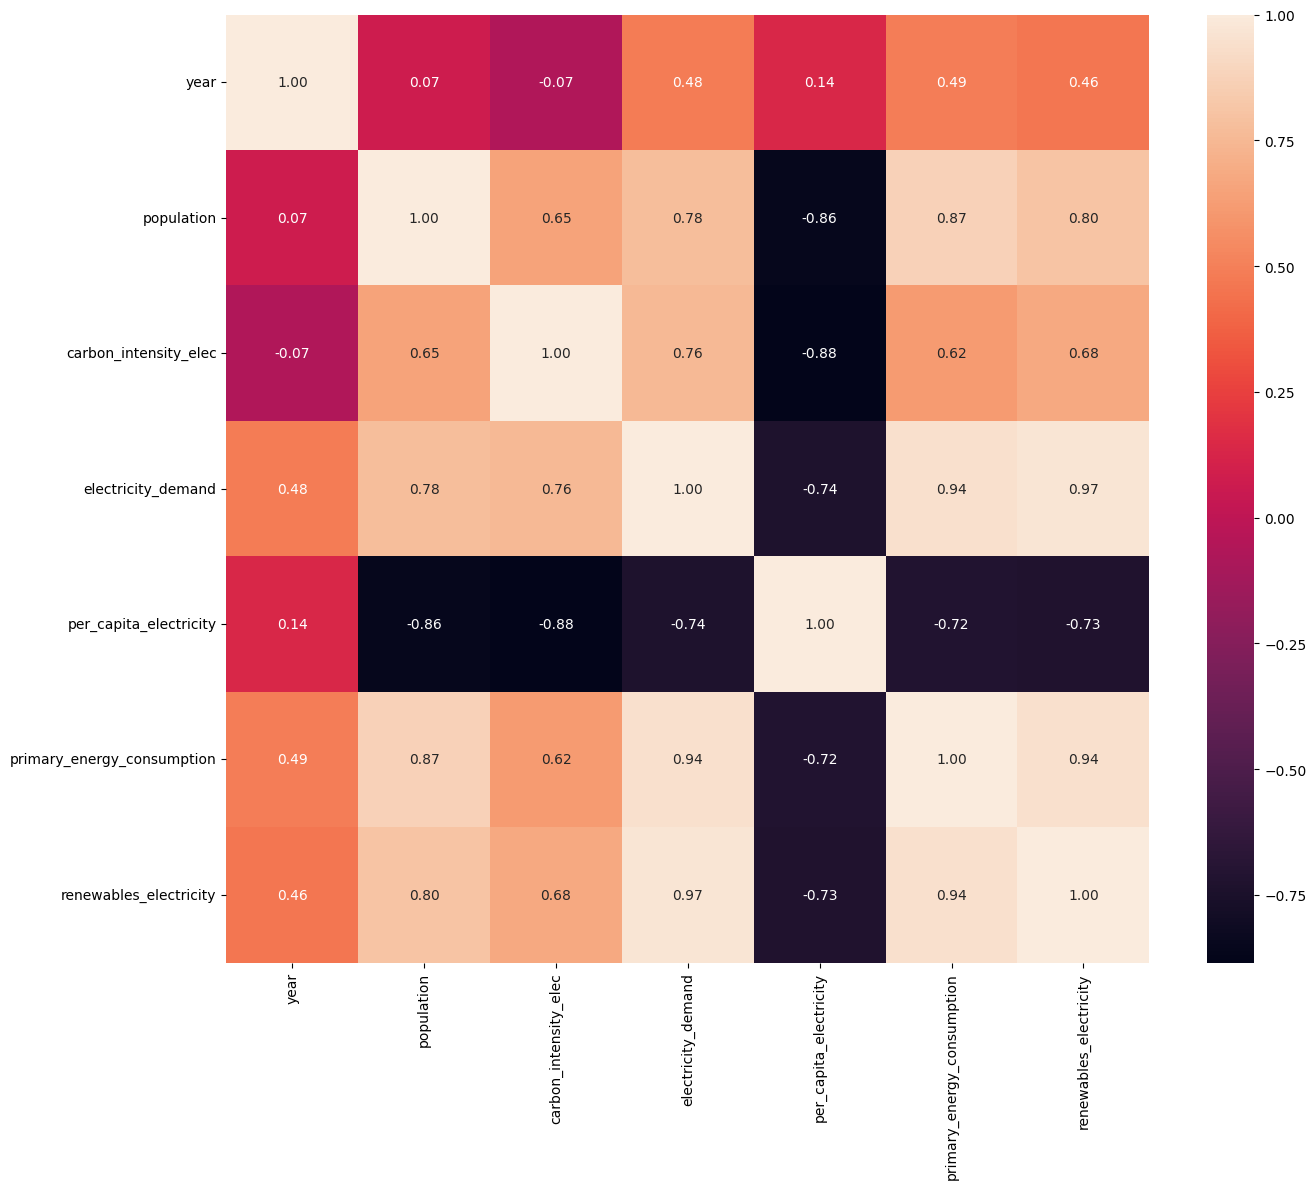

In [12]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.drop(columns=['iso_code', 'country']).corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

Berikut **beberapa insight** dari korelasi antar variabel yang muncul:

| Variabel 1 | Variabel 2 | Korelasi | Insight |
|:---|:---|:---|:---|
| `primary_energy_consumption` | `renewables_electricity` | **+0.94** | Konsumsi energi primer naik → listrik dari energi terbarukan juga ikut naik. |
| `primary_energy_consumption` | `electricity_demand` | **+0.94** | Permintaan listrik naik → konsumsi energi primer naik drastis. |
| `electricity_demand` | `renewables_electricity` | **+0.97** | Semakin tinggi demand listrik → energi terbarukan lebih dimanfaatkan. |
| `population` | `primary_energy_consumption` | **+0.87** | Populasi lebih besar → kebutuhan energi lebih besar. |
| `population` | `electricity_demand` | **+0.78** | Populasi tumbuh → permintaan listrik juga naik. |
| `per_capita_electricity` | `population` | **-0.86** | Negara berpenduduk besar → listrik per kapita cenderung lebih kecil. |

## Forecast

In [13]:
results = {}
features = ['population', 'electricity_demand', 'per_capita_electricity',
            'primary_energy_consumption', 'renewables_electricity']
for negara in ['Indonesia', 'Malaysia', 'Singapore']:
    df_negara = df[df['country'] == negara]
    forecast = {}
    for feature in features:
        X = df_negara['year'].values.reshape(-1, 1)
        y = df_negara[feature].values
        model = LinearRegression()
        model.fit(X, y)
        forecast[feature] = model.predict(np.arange(2024, 2031).reshape(-1, 1))
    results[negara] = pd.DataFrame(forecast, index=np.arange(2024, 2031))

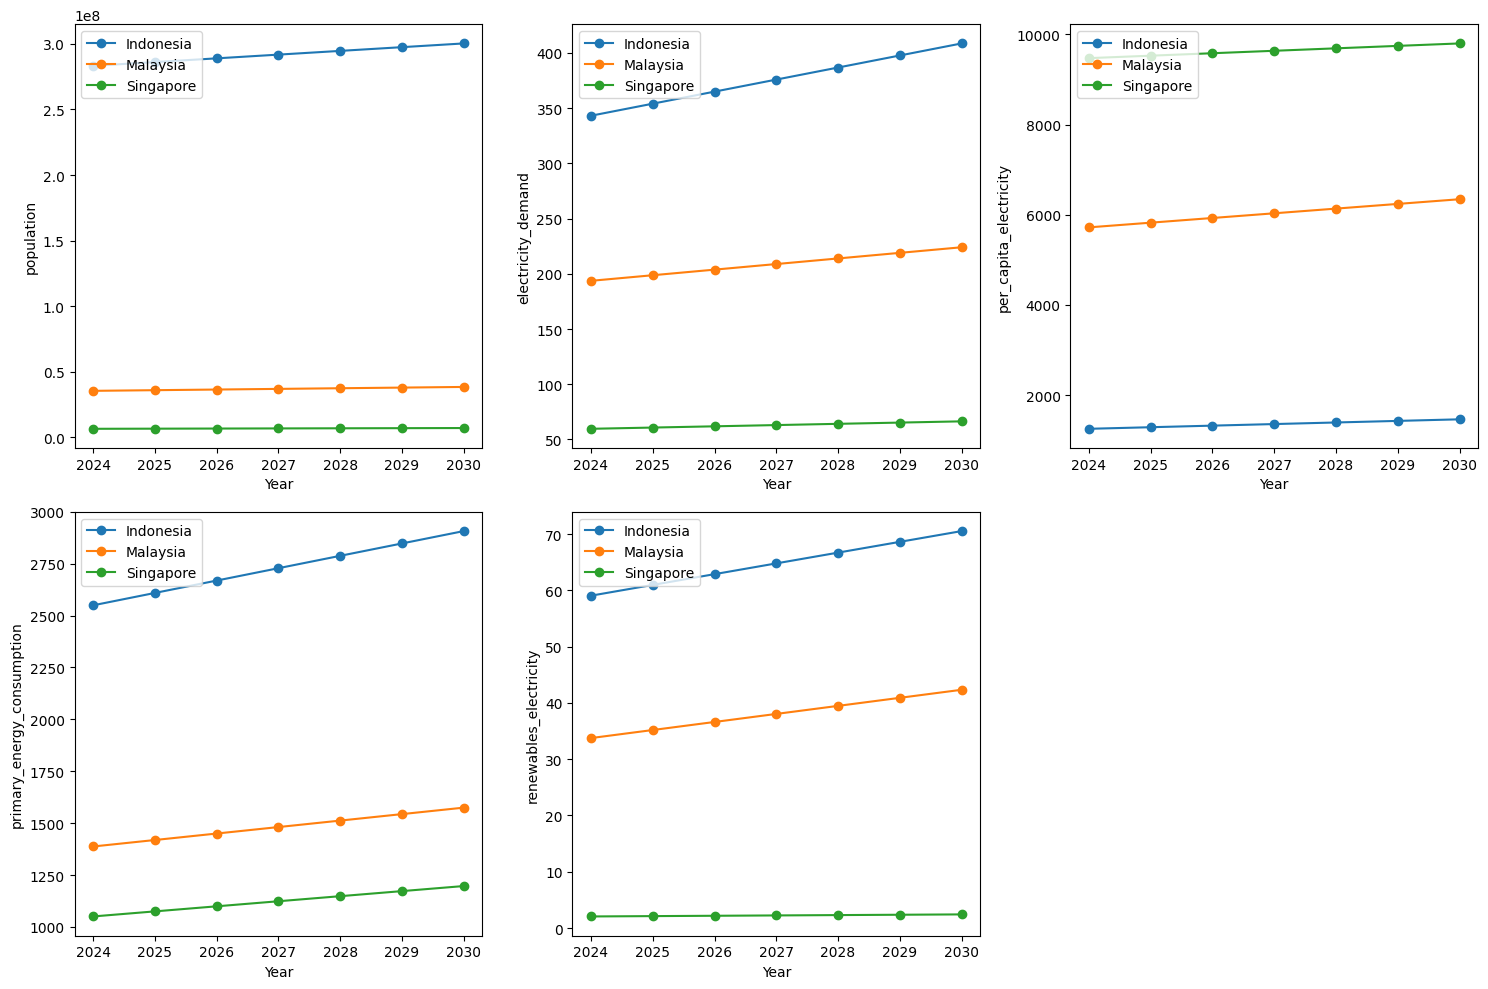

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features = ['population', 'electricity_demand', 'per_capita_electricity',
            'primary_energy_consumption', 'renewables_electricity']
for i, (feature, ax) in enumerate(zip(features, axes.flatten())):
    for negara, df_forecast in results.items():
        ax.plot(df_forecast.index, df_forecast[feature], marker='o', label=f'{negara}')
    ax.set_xlabel("Year")
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
if len(features) < len(axes.flatten()):
    for j in range(len(features), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])
plt.tight_layout()
plt.show()

Berdasarkan forecast ini:
- Populasi Indonesia akan terus bertumbuh hingga mendekati 300 juta jiwa pada 2030. Artinya, tekanan terhadap kebutuhan listrik dan energi akan makin berat.
- Forecast menunjukkan **kenaikan tajam** di Indonesia, dari sekitar 340 ke 400+ TWh permintaan listrik sampai 2030, sehingga perlu meningkatkan kapasitas pembangkitan energi.
- Konsumsi listrik per kapita Indonesia masih rendah, gap dengan Malaysia dan Singapore masih besar.
- Pada 2030 renewables electricity Indonesia masih belum dominan.

# **Recommendation untuk Indonesia**

Berdasarkan hasil eksplorasi data dan forecast:

- **Prioritas** percepat pembangunan solar farm, wind farm, dan geothermal plant.
- **Teknologi** battery storage, smart grid dan microgrid harus terus dikembangkan.
- Implementasi program wajib efisiensi energi untuk rumah tangga, industri, dan transportasi.
- Berikan insentif besar untuk investasi di proyek green energy.

# Project Requirements

In [15]:
!pip freeze > requirements.txt